download datasets from uci ml repo and [luis torgo's regression data page](https://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html)

unfortunately, it seems like luis torgo's dataset page is not directly accessible. nonethless, it is still avaiable through [wayback machine](https://web.archive.org/web/): for example. this [link](https://web.archive.org/web/20180628054858/https://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html) is a snapshot of the website as of june 28, 2018

---

In [1]:
import pandas as pd

In [7]:
import seaborn as sns
sns.set_context('notebook')
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
def plot_target_dist(df):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, 
                                        figsize=(12,3))
    sns.distplot(df.target, kde=False, ax=ax1)
    sns.distplot(pd.np.log2(df.target.values+1e-8), kde=False, ax=ax2)
    _ = sns.distplot(pd.np.log10(df.target.values+1e-8), kde=False, ax=ax3)

---

### classification

#### breast cancer

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

In [14]:
%%bash
wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

In [19]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, na_values=['', '?'])
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2


In [20]:
df.columns = ['id', 'clump_thickness', 'cell_size', 'cell_shape',
              'marginal_adhesion', 'se_cell_size', 'bare_nuclei', 'bland_chromatin',
              'normal_nucleoli', 'mitoses', 'target',
             ]
df.head(2)

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,se_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,target
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2


In [21]:
df.drop(columns=['id'], inplace=True)
df.isnull().sum()

clump_thickness       0
cell_size             0
cell_shape            0
marginal_adhesion     0
se_cell_size          0
bare_nuclei          16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
target                0
dtype: int64

In [22]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(683, 10)

In [25]:
df = df[['target'] + df.columns[:-1].tolist()]
df.head(2)

,target,clump_thickness,cell_size,cell_shape,marginal_adhesion,se_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,2,5,1,1,1,2,1.0,3,1,1
1,2,5,4,4,5,7,10.0,3,2,1


In [26]:
df['target'] = df.target.map({2:0, 4:1})
df.target.value_counts()

0    444
1    239
Name: target, dtype: int64

In [27]:
df.to_csv('breastcancer.csv', index=False)

---

#### spambase

In [30]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', 
                 header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [31]:
column_list = ['word_freq_{}'.format(i) for i in range(1, 49)]
column_list += ['char_freq_{}'.format(i) for i in range(1, 7)]
column_list += ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'target']
len(column_list)

58

In [32]:
df.columns = column_list
df.head(2)

,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,word_freq_10,...,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [33]:
df = df[['target']+df.columns.tolist()[:-1]]
df.head(2)

,target,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,...,word_freq_48,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,...,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,...,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028


In [34]:
df.shape

(4601, 58)

In [37]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [38]:
df.to_csv('spambase.csv', index=False)

---

#### SPECTF

In [47]:
df_train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.train', header=None)
df_train.shape

(80, 45)

In [48]:
df_test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test', header=None)
df_test.shape

(187, 45)

In [49]:
df = df_train.append(df_test, ignore_index=True)
df.shape

(267, 45)

In [52]:
column_list = ['target', 'F1R','F1S','F2R','F2S','F3R','F3S','F4R','F4S','F5R','F5S',
               'F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R','F10S',
               'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R',
               'F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',
               'F20R','F20S','F21R','F21S','F22R','F22S']

In [53]:
df.columns = column_list
df.shape

(267, 45)

In [54]:
df.target.value_counts()

1    212
0     55
Name: target, dtype: int64

In [55]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [56]:
df.to_csv('spectf.csv', index=False)

---

#### parkinsons

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [3]:
df.drop(columns=['name'], inplace=True)

In [4]:
df = df[['status'] + df.columns[df.columns!='status'].tolist()]

In [5]:
df.rename(columns={'status': 'target'}, inplace=True)
df.head(2)

,target,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [6]:
df.shape

(195, 23)

In [42]:
df.to_csv('parkinsons.csv', index=False)

---

### regression

#### appliances energy use

In [51]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df = pd.read_csv(url)
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [52]:
df.drop(columns=['date'], inplace=True)
df.columns = ['target'] + df.columns[1:].tolist()
df.head(2)

,target,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [53]:
(df.isnull().sum() > 0).sum()

0

In [54]:
df.shape

(19735, 28)

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


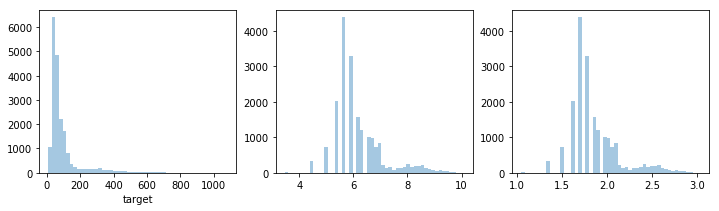

In [59]:
plot_target_dist(df)

In [60]:
df['target'] = pd.np.log2(df['target']+1)

In [61]:
df.to_csv('appenergy.csv', index=False)

---

#### residential building

`building.csv` was obtained by downloading the [original excel file](https://archive.ics.uci.edu/ml/machine-learning-databases/00437/Residential-Building-Data-Set.xlsx)

In [7]:
column_list = ['START_YEAR', 'START_QUARTER', 'COMPLETION_YEAR', 'COMPLETION_QUARTER']
column_list += ['V{}'.format(i) for i in range(1,9)]
column_list += ['V{}_lag{}'.format(i, j) for j in range(1,6) for i in range(11, 30)]
column_list += ['V-9', 'V-10']

In [8]:
len(column_list)

109

In [9]:
df = pd.read_csv('building.csv')
df.columns = column_list
df.shape

(372, 109)

according to the [link](https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set), there are 105 columns. i'll drop the first 4 then

In [10]:
df = df[df.columns[4:]]

In [11]:
df.columns[df.isnull().sum()>0]

Index([], dtype='object')

note that there are 5 groups of `V-11` to `V-29` for 5 time lags

`V-9` and `V-10` are output variables:
- `V-9`: Actual sales prices (output)
- `V-10`: Actual construction costs (output)

In [12]:
df[['V-9', 'V-10']].corr()

,V-9,V-10
V-9,1.000000,0.796041
V-10,0.796041,1.000000


construct two datasets for this

##### sales

In [75]:
sales_df = df.rename(columns={'V-9':'target'})
sales_df = sales_df[['target']+[col for col in sales_df.columns if col!='target']]
sales_df.head(2)

,target,V1,V2,V3,V4,V5,V6,V7,V8,V11_lag1,...,V21_lag5,V22_lag5,V23_lag5,V24_lag5,V25_lag5,V26_lag5,V27_lag5,V28_lag5,V29_lag5,V-10
0,2200.0,1.0,3150.0,920.0,598.5,190.0,1010.84,16.0,1200.0,6713.0,...,733.8,815.5,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,410.0
1,5000.0,1.0,7600.0,1140.0,3040.0,400.0,963.81,23.0,2900.0,3152.0,...,1143.8,1316.3,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,1000.0


drop construction cost

In [76]:
sales_df.drop(columns=['V-10'], inplace=True)
sales_df.shape

(372, 104)

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


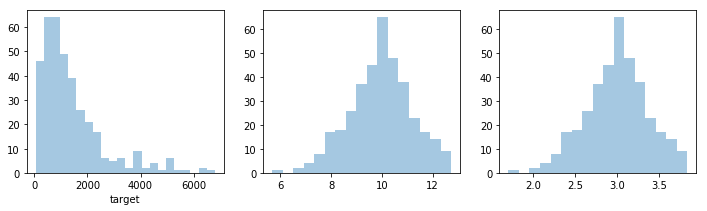

In [77]:
plot_target_dist(sales_df)

In [78]:
sales_df['target'] = pd.np.log2(sales_df.target.values+1)

In [79]:
sales_df.to_csv('building_sales.csv', index=False)

##### costs

In [80]:
costs_df = df.rename(columns={'V-10':'target'})
costs_df = costs_df[['target']+[col for col in costs_df.columns if col!='target']]
costs_df.head(2)

,target,V1,V2,V3,V4,V5,V6,V7,V8,V11_lag1,...,V21_lag5,V22_lag5,V23_lag5,V24_lag5,V25_lag5,V26_lag5,V27_lag5,V28_lag5,V29_lag5,V-9
0,410.0,1.0,3150.0,920.0,598.5,190.0,1010.84,16.0,1200.0,6713.0,...,733.8,815.5,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200.0
1,1000.0,1.0,7600.0,1140.0,3040.0,400.0,963.81,23.0,2900.0,3152.0,...,1143.8,1316.3,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000.0


drop construction cost

In [81]:
costs_df.drop(columns=['V-9'], inplace=True)
costs_df.shape

(372, 104)

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


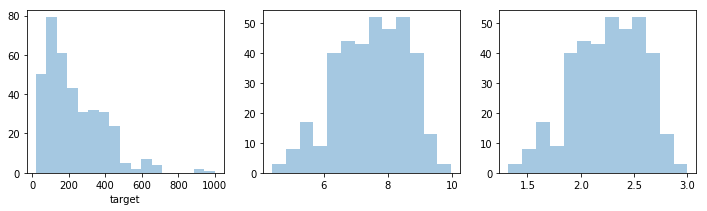

In [82]:
plot_target_dist(costs_df)

In [83]:
costs_df['target'] = pd.np.log2(costs_df.target.values+1)

In [52]:
costs_df.to_csv('building_costs.csv', index=False)

---

#### pole

In [ ]:
%%bash
wget -q https://www.dcc.fc.up.pt/~ltorgo/Regression/pol.tgz

In [29]:
%%bash
tar -xvzf pol.tgz

PoleTelecomm/pol.data
PoleTelecomm/pol.test
PoleTelecomm/pol.domain


In [30]:
column_names = pd.read_csv('PoleTelecomm/pol.domain', delimiter=':', header=None)[0].values
column_names = pd.np.array([item.strip() for item in column_names])
column_names

array(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38',
       'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47',
       'f48', 'foo'], 
      dtype='<U3')

In [31]:
df = pd.read_csv('PoleTelecomm/pol.data', header=None)
df = df.append(pd.read_csv('PoleTelecomm/pol.test', header=None), ignore_index=True)
df.columns = column_names
df.shape

(15000, 49)

In [32]:
df = df[['foo'] + df.columns[:-1].tolist()]
df.rename(columns={'foo': 'target'}, inplace=True)
df.head(2)

,target,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48
0,0,110,100,100,100,60,108,76,71,94,...,0,0,0,0,0,0,0,0,0,0
1,0,110,100,100,100,130,77,76,71,94,...,0,0,0,0,0,0,0,0,0,0


/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


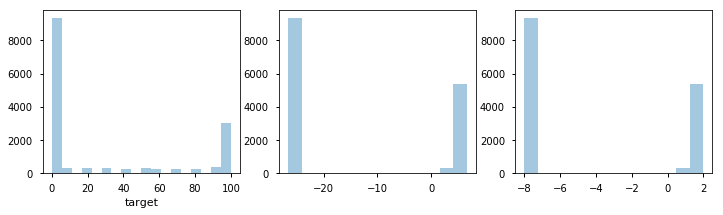

In [38]:
plot_target_dist(df)

In [32]:
df.to_csv('pol.csv', index=False)

---

#### breastcancer (reg)

breast cancer for regression

In [53]:
%%bash
wget -q https://www.dcc.fc.up.pt/~ltorgo/Regression/wisconsin.tar.gz
tar -xvzf wisconsin.tar.gz

WiscoinBreastCancer/r_wpbc.data
WiscoinBreastCancer/r_wpbc.domain


In [94]:
column_names = pd.read_csv('WiscoinBreastCancer/r_wpbc.domain', delimiter=':', header=None)[0].values
column_names = pd.np.array([item.strip() for item in column_names])
column_names

array(['Lymph_node', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Tumor_size', 'Time'], 
      dtype='<U23')

In [95]:
df = pd.read_csv('WiscoinBreastCancer/r_wpbc.data', header=None)
df.columns = column_names
df.shape

(194, 33)

In [96]:
df = df[['Time'] + df.columns[:-1].tolist()]
df.rename(columns={'Time': 'target'}, inplace=True)
df.head(2)

,target,Lymph_node,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Tumor_size
0,31,5,18.02,27.60,117.5,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.7,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,61,2,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0


/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


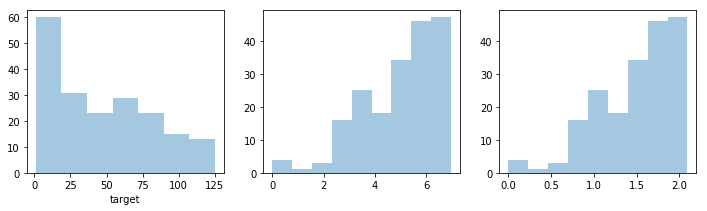

In [97]:
plot_target_dist(df)

In [58]:
df.to_csv('breastcancer_reg.csv', index=False)

---

#### boston housing

In [38]:
%%bash
wget -q https://www.dcc.fc.up.pt/~ltorgo/Regression/housing.tar.gz
tar -xvzf housing.tar.gz

Housing/housing.data
Housing/housing.domain


In [82]:
column_names = pd.read_csv('Housing/housing.domain', delimiter=':', header=None)[0].values
column_names = pd.np.array([item.strip() for item in column_names])
column_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'class'], 
      dtype='<U7')

In [83]:
df = pd.read_csv('Housing/housing.data', header=None)
df.columns = column_names
df.shape

(506, 14)

In [84]:
df = df[['class'] + df.columns[:-1].tolist()]
df.rename(columns={'class': 'target'}, inplace=True)
df.head(2)

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.006,18.0,2.31,0,0.538,6.575,65.2,4.090,1,296.0,15.3,396.898,4.98
1,21.6,0.027,0.0,7.07,0,0.469,6.421,78.9,4.967,2,242.0,17.8,396.898,9.14


/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


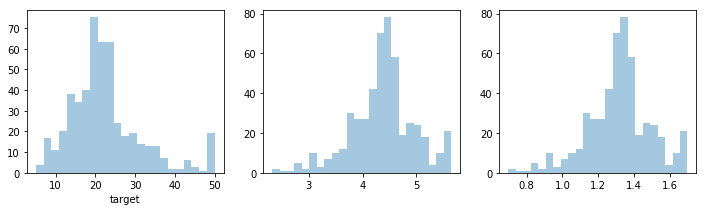

In [85]:
plot_target_dist(df)

In [42]:
df.to_csv('boston_housing.csv', index=False)

---

#### triazines

In [48]:
%%bash
wget -q https://www.dcc.fc.up.pt/~ltorgo/Regression/triazines.tar.gz
tar -xvzf triazines.tar.gz

triazines/triazines.data
triazines/triazines.domain


In [90]:
column_names = pd.read_csv('triazines/triazines.domain', delimiter=':', header=None)[0].values
column_names = pd.np.array([item.strip() for item in column_names])
column_names

array(['p1_polar', 'p1_size', 'p1_flex', 'p1_h_doner', 'p1_h_acceptor',
       'p1_pi_doner', 'p1_pi_acceptor', 'p1_polarisable', 'p1_sigma',
       'p1_branch', 'p2_polar', 'p2_size', 'p2_flex', 'p2_h_doner',
       'p2_h_acceptor', 'p2_pi_doner', 'p2_pi_acceptor', 'p2_polarisable',
       'p2_sigma', 'p2_branch', 'p3_polar', 'p3_size', 'p3_flex',
       'p3_h_doner', 'p3_h_acceptor', 'p3_pi_doner', 'p3_pi_acceptor',
       'p3_polarisable', 'p3_sigma', 'p3_branch', 'p4_polar', 'p4_size',
       'p4_flex', 'p4_h_doner', 'p4_h_acceptor', 'p4_pi_doner',
       'p4_pi_acceptor', 'p4_polarisable', 'p4_sigma', 'p4_branch',
       'p5_polar', 'p5_size', 'p5_flex', 'p5_h_doner', 'p5_h_acceptor',
       'p5_pi_doner', 'p5_pi_acceptor', 'p5_polarisable', 'p5_sigma',
       'p5_branch', 'p6_polar', 'p6_size', 'p6_flex', 'p6_h_doner',
       'p6_h_acceptor', 'p6_pi_doner', 'p6_pi_acceptor', 'p6_polarisable',
       'p6_sigma', 'p6_branch', 'activity'], 
      dtype='<U14')

In [91]:
df = pd.read_csv('triazines/triazines.data', header=None)
df.columns = column_names
df.shape

(186, 61)

In [92]:
df = df[['activity'] + df.columns[:-1].tolist()]
df.rename(columns={'activity': 'target'}, inplace=True)
df.head(2)

,target,p1_polar,p1_size,p1_flex,p1_h_doner,p1_h_acceptor,p1_pi_doner,p1_pi_acceptor,p1_polarisable,p1_sigma,...,p6_polar,p6_size,p6_flex,p6_h_doner,p6_h_acceptor,p6_pi_doner,p6_pi_acceptor,p6_polarisable,p6_sigma,p6_branch
0,0.726,0.58,0.233,0.1,0.1,0.1,0.5,0.1,0.5,0.9,...,0.9,0.5,0.1,0.1,0.1,0.1,0.9,0.9,0.633,0.633
1,0.564,0.10,0.100,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100,0.100


/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


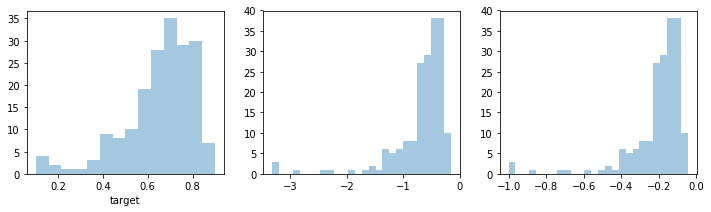

In [93]:
plot_target_dist(df)

In [52]:
df.to_csv('triazines.csv', index=False)

---

#### parkinsons_updrs

no log for this one

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')
df.head(2)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [14]:
df.drop(columns=['subject#'], inplace=True)
df.shape

(5875, 21)

also drop `age`, `sex`, and `test_time`

In [106]:
df.drop(columns=['age', 'sex', 'test_time'], inplace=True)

##### motor

In [107]:
df.head(2)

,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [108]:
motor_df = df.rename(columns={'motor_UPDRS': 'target'})
motor_df.drop(columns=['total_UPDRS'], inplace=True)
motor_df = motor_df[['target']+[col for col in motor_df.columns if col!='target']]
motor_df.head(2)

,target,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [109]:
motor_df.shape

(5875, 17)

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


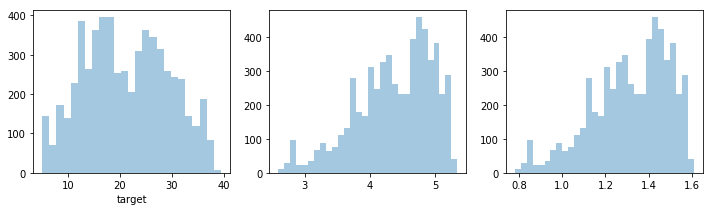

In [111]:
plot_target_dist(motor_df)

In [9]:
motor_df.to_csv('parkinsons_motor.csv', index=False)

##### total

In [114]:
df.head(2)

,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [115]:
total_df = df.rename(columns={'total_UPDRS': 'target'})
total_df.drop(columns=['motor_UPDRS'], inplace=True)
total_df = total_df[['target']+[col for col in total_df.columns if col!='target']]

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


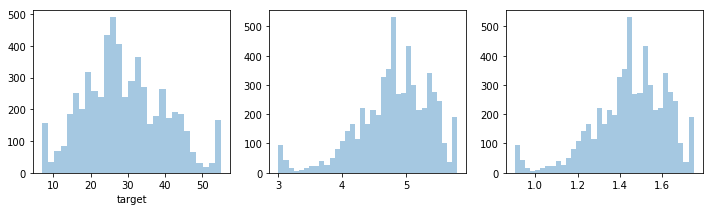

In [116]:
plot_target_dist(total_df)

In [117]:
total_df.to_csv('parkinsons_total.csv', index=False)